# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ahmad Mufadhdhal Alkifani
- **Email:** ahmadmufadhdhal47@gmail.com
- **ID Dicoding:** a322ybf029

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan perusahaan selama setahun terakhir?
- Pada jam berapa penyewaan sepeda terbanyak dan tersedikit?
- Pada musim apa penyewaan sepeda terbanyak?

## Import Semua Packages/Library yang Digunakan

In [6]:
# memanggil semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [9]:
# #Mengambil data yang ada didalam drive agar memudahkan dalam menampilkan data
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# import os

# folder_path = "/content/drive/My Drive/Bike-sharing-dataset"
# files = os.listdir(folder_path)
# print(files) #menampilkan isi dari folder

# #variabel untuk memanggil dataset yang ada didalam drive
# file_day = '/content/drive/My Drive/Bike-sharing-dataset/day.csv'
# file_hour = '/content/drive/My Drive/Bike-sharing-dataset/hour.csv'

In [11]:
#memanggil dataset dan juga menampilkan data dalam bentuk tabel
#pemanggilan dataset day

#jika memanggil dari drive
# day_data = pd.read_csv(file_day)

#jika memanggil dari local
day_data = pd.read_csv('day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [105]:
#memanggil dataset dan juga menampilkan data dalam bentuk tabel
#pemanggilan dataset hour

#jika panggil dari drive
# hour_data = pd.read_csv(file_hour)

#jika memanggil dari lokal
hour_data = pd.read_csv('hour.csv')
hour_data.head()

NameError: name 'file_hour' is not defined

### Assessing Data

In [14]:
# memeriksa tipe data dari setiap kolom yang terdapat didalam dataset hour dan dataset day
hour_data.info()
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [15]:
#mengecek missing value pada dataset day
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
#mengecek missing value pada dataset hour
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
#memeriksa data yang duplikasi didalam dataset day dan hour
print(f"Jumlah duplikasi data day: {day_data.duplicated().sum()}")
print(f"Jumlah duplikasi data hour: {hour_data.duplicated().sum()}")

Jumlah duplikasi data day: 0
Jumlah duplikasi data hour: 0


In [18]:
#memeriksa parameter statistik yang ada didalam dataset day
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
#memeriksa parameter statistik yang ada didalam dataset hour
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- Menghilangkan data yang tidak perlu seperti instant dan workingday
- Membuat data menjadi **categorical** seperti season, mnth, holiday, weeekday, dan weathersit yang mana sebelumnya menggunakan tipe data integral (int).
- Mengubah tipe data dteday menjadi datetime (yang sebelumnya bertipe 'object')
- Memperbaiki nama kolom dan mengkonversi isi kolom agar mudah dipahami.
- Membuat kolom baru yang menampung data weekend atau weekdays.

####Dropping

In [23]:
#menghapus data yang tidak perlu
# Check if 'workingday' column exists before dropping
if 'workingday' in day_data.columns:
    day_data.drop(['workingday'], axis=1, inplace=True)
    hour_data.drop(['workingday'], axis=1, inplace=True)
    print("Column 'workingday' berhasil dihapus.")
else:
    print("Column 'workingday' tidak ditemukan atau sudah dihapus.")

Column 'workingday' berhasil dihapus.


In [24]:
# #menghapus data yang tidak perlu
# # Check if 'instant' column exists before dropping
# if 'instant' in day_data.columns:
#     day_data.drop(['instant'], axis=1, inplace=True)
#     hour_data.drop(['instant'], axis=1, inplace=True)
#     print("Column 'instant' berhasil dihapus.")
# else:
#     print("Column 'instant' tidak ditemukan atau sudah dihapus.")

####Mengubah Tipe Data

In [26]:
# mengubah data menjadi categorical seperti season, mnth, holiday, weeekday, dan weathersit yang mana sebelumnya menggunakan tipe data integral (int).
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
for col in columns:
    day_data[col] = day_data[col].astype('category')
    hour_data[col] = hour_data[col].astype('category')
    print(f"Kolom {col} berhasil diubah menjadi tipe data kategori.")

# mengubah tipe data dteday menjadi datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
print("Kolom 'dteday' berhasil diubah menjadi tipe data datetime.")

Kolom season berhasil diubah menjadi tipe data kategori.
Kolom mnth berhasil diubah menjadi tipe data kategori.
Kolom holiday berhasil diubah menjadi tipe data kategori.
Kolom weekday berhasil diubah menjadi tipe data kategori.
Kolom weathersit berhasil diubah menjadi tipe data kategori.
Kolom 'dteday' berhasil diubah menjadi tipe data datetime.


###Rename
Memperbaiki nama colom agar mudah dipahami didalam dataset

In [28]:
#mengganti nama kolom agar mudah dipahami
day_data.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'cnt': 'total_count'}, inplace=True)
print("Kolom berhasil diubah pada dataset day.")

hour_data.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hours',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'cnt': 'total_count'}, inplace=True)
print("Kolom berhasil diubah pada dataset hour.")

Kolom berhasil diubah pada dataset day.
Kolom berhasil diubah pada dataset hour.


In [29]:
# Mengkonversi isi kolom agar mudah dipahami
# konversi season menjadi : 1: spring, 2:summer, 3: fall, 4: winter.
day_data.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_data.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_data.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_data.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_condition menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_data.weather_condition.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_data.weather_condition.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi day_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_data.day_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_data.day_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_data.year.replace((0,1), ('2011','2012'), inplace=True)
hour_data.year.replace((0,1), ('2011','2012'), inplace=True)

# Menghitung Humidity
day_data['humidity'] = day_data['humidity']*100
hour_data['humidity'] = hour_data['humidity']*100

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18880\395759839.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_data.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18880\395759839.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_d

Membuat kolom baru bernama category_days yang menunjukkan isi kolom tersebut weekend atau weekdays

In [31]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
day_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(day_of_week):
    if day_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_data["category_days"] = hour_data["day_of_week"].apply(get_category_days)
day_data["category_days"] = day_data["day_of_week"].apply(get_category_days)

In [32]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_data["humidity_category"] = hour_data["humidity"].apply(classify_humidity)
day_data["humidity_category"] = day_data["humidity"].apply(classify_humidity)

Menyimpan Data yang telah di ubah

In [34]:
print('Data pada file day.csv')
print(day_data.head())  # Pastikan perubahan sudah ada sebelum save
print('')
print('Data Pada file hour.csv')
print(hour_data.head())  # Pastikan perubahan sudah ada sebelum save

Data pada file day.csv
   instant       date  season  year month is_holiday day_of_week  \
0        1 2011-01-01  Spring  2011   Jan          0    Saturday   
1        2 2011-01-02  Spring  2011   Jan          0      Sunday   
2        3 2011-01-03  Spring  2011   Jan          0      Monday   
3        4 2011-01-04  Spring  2011   Jan          0     Tuesday   
4        5 2011-01-05  Spring  2011   Jan          0   Wednesday   

  weather_condition  temperature  feeling_temperature  humidity  windspeed  \
0             Misty     0.344167             0.363625   80.5833   0.160446   
1             Misty     0.363478             0.353739   69.6087   0.248539   
2             Clear     0.196364             0.189405   43.7273   0.248309   
3             Clear     0.200000             0.212122   59.0435   0.160296   
4             Clear     0.226957             0.229270   43.6957   0.186900   

   casual  registered  total_count category_days humidity_category  
0     331         654         

In [35]:
import os

save_path = 'E:/Laskar AI'  # Sesuaikan dengan lokasi yang diinginkan
if not os.path.exists(save_path):
    os.makedirs(save_path)

day_data.to_csv(os.path.join(save_path, 'day_clean.csv'), index=False)
hour_data.to_csv(os.path.join(save_path, 'hour_clean.csv'), index=False)

dapat dilihat
* Sudah menghapus kolom instant dan workingday ✓
* tipe data pada kolom dteday sudah berubah menjadi datetime ✓
* tipe data int pada season, mnth, holiday, weekday, workingday, weathersit sudah berubah menjadi tipe data category ✓
* Sudah mengganti nama kolom agar lebih mudah dibaca  ✓
* Sudah Mengkonversi isi kolom agar mudah dipahami ✓
* Sudah membuat kolom baru bernama category_days yang berisi weekend atau weekdays ✓

## Exploratory Data Analysis (EDA)

### Explore Data hour_data

In [39]:
#melihat parameter statistik dari dataset hour_data
hour_data.describe(include='all')

,instant,date,season,year,month,hours,is_holiday,day_of_week,weather_condition,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_count,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


Berdasarkan hasil rangkuman statistik diatas, didapatkan bahwa jumlah pelanggan sebanyak 17379. Berdasarkan data yang diperoleh, rata-rata penyewaan sepeda terjadi antara pada jam 11.54 dengan standar deviasinya sebesar 6.91

In [41]:
#penyewaan berdasarkan jam
hour_data.groupby(by='hours').agg({
    'total_count': 'sum'
})

,total_count
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang memilliki banyak menyewa sepeda terjadi pada jam 17.00 sedangkan penyewaan sepeda yang paling sedikit dimiliki pada jam 04.00

### Explore Data day_data

In [44]:
#melihat parameter statistik dari dataset day_data
day_data.describe(include='all')

,instant,date,season,year,month,is_holiday,day_of_week,weather_condition,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_count,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


Berdasarkan hasil rangkuman parameter statistik di atas, diperoleh informasi jumlah pelanggan sebanyak 17379 orang di musim 1 - 4

In [46]:
# melihat jumlah data penyewaan setiap season
day_data.groupby(by='season').agg({
    'total_count': 'sum'
})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18880\1383404482.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_data.groupby(by='season').agg({


,total_count
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


Berdasarkan hasil yang didapatkan, diketahui bahwa season Fall dan summer merupakan jumlah musim yang memiliki jumlah terbanyak dalam penyewaan.

In [48]:
# melihat jumlah data penyewaan tiap tahun berdasarkan registered dan casual
day_data.groupby(by='year').agg({
    'registered': 'sum',
    'casual': 'sum'
})

,registered,casual
year,,
2011,995851,247252
2012,1676811,372765


Berdasarkan hasil yang didapatkan, data yang sudah mempunyai member pada tahun 2011 sebanyak 995851, sedangkan yang belum menjadi member sebanyak 247252.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa sewa sepeda paling banyak dan sedikit?

In [52]:
# membuat grup terhadap hour dan total_count
# sum_order_hour = hour_data.groupby(by='hour').agg({
#     'total_count': 'sum'
# })
sum_order_items = hour_data.groupby("hours").total_count.sum().sort_values(ascending=False).reset_index()

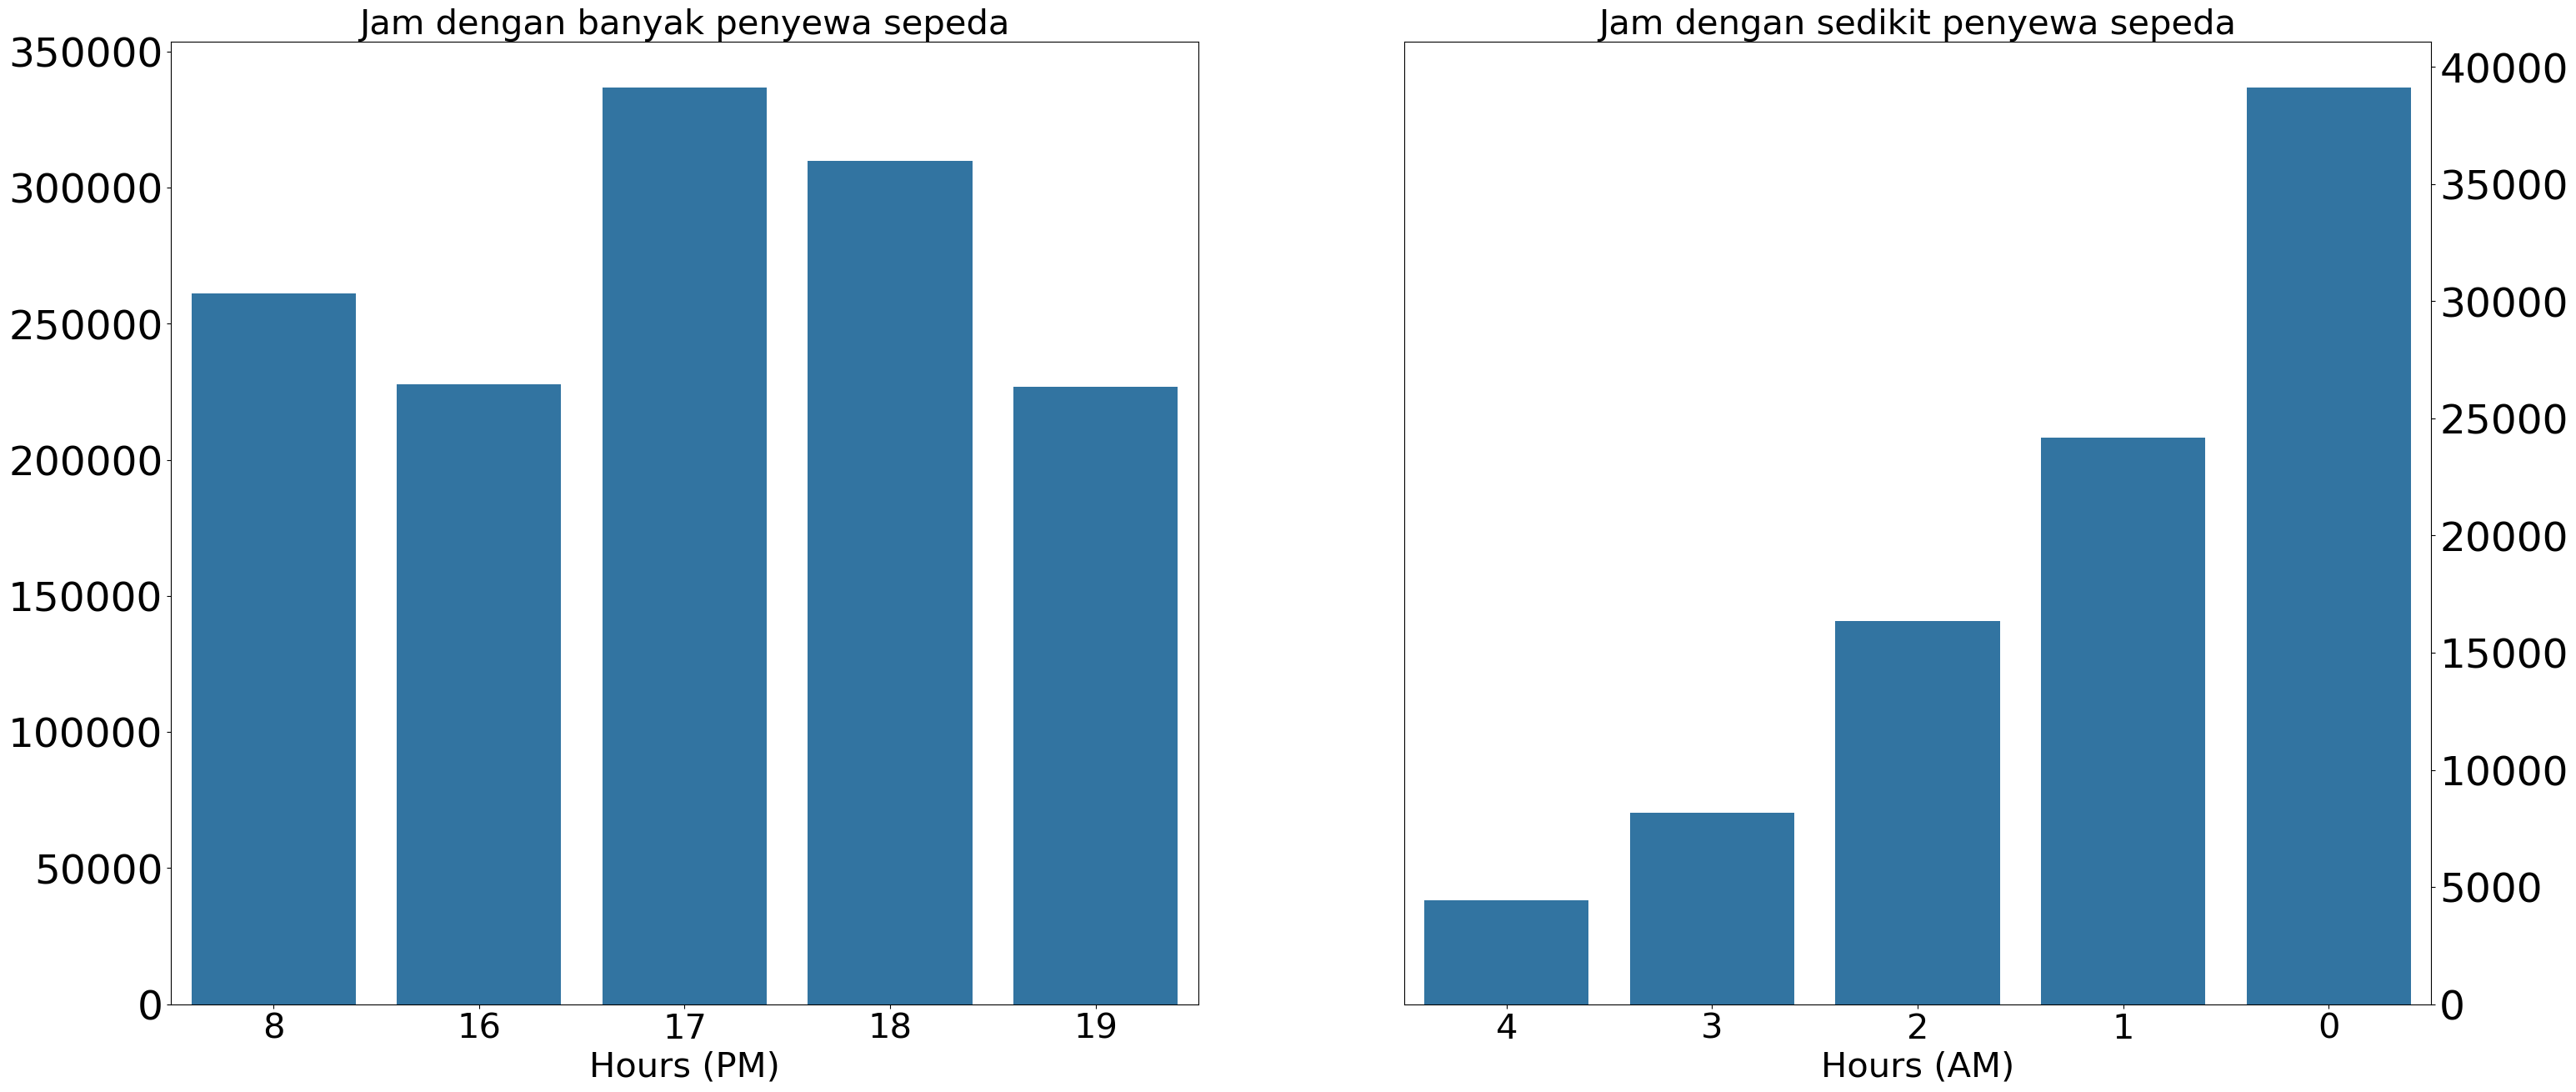

In [53]:
#membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# membuat barplot untuk penyewa sepeda terbanyak
sns.barplot(x="hours", y="total_count", data=sum_order_items.head(5), ax=ax[0])

#mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# membuat barplot untuk penyewa sepeda terdikit
sns.barplot(x="hours", y="total_count", data=sum_order_items.sort_values(by="hours", ascending=True).head(5), ax=ax[1])

# #mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# menampilkan plot
plt.show()

Berdarkan gambar diatas, dapat disimpulkan bahwa penyewaan sepeda paling banyak digunakan pada jam 17 sekitar **300000-an** penyewa. Sedangkan untuk penyewaan sepeda paling sedikit sekitar jam 4 yaitu dibawah **5000-an** penyewa.

### Pertanyaan 2: Pada musim apa penyewaan sepeda paling banyak?

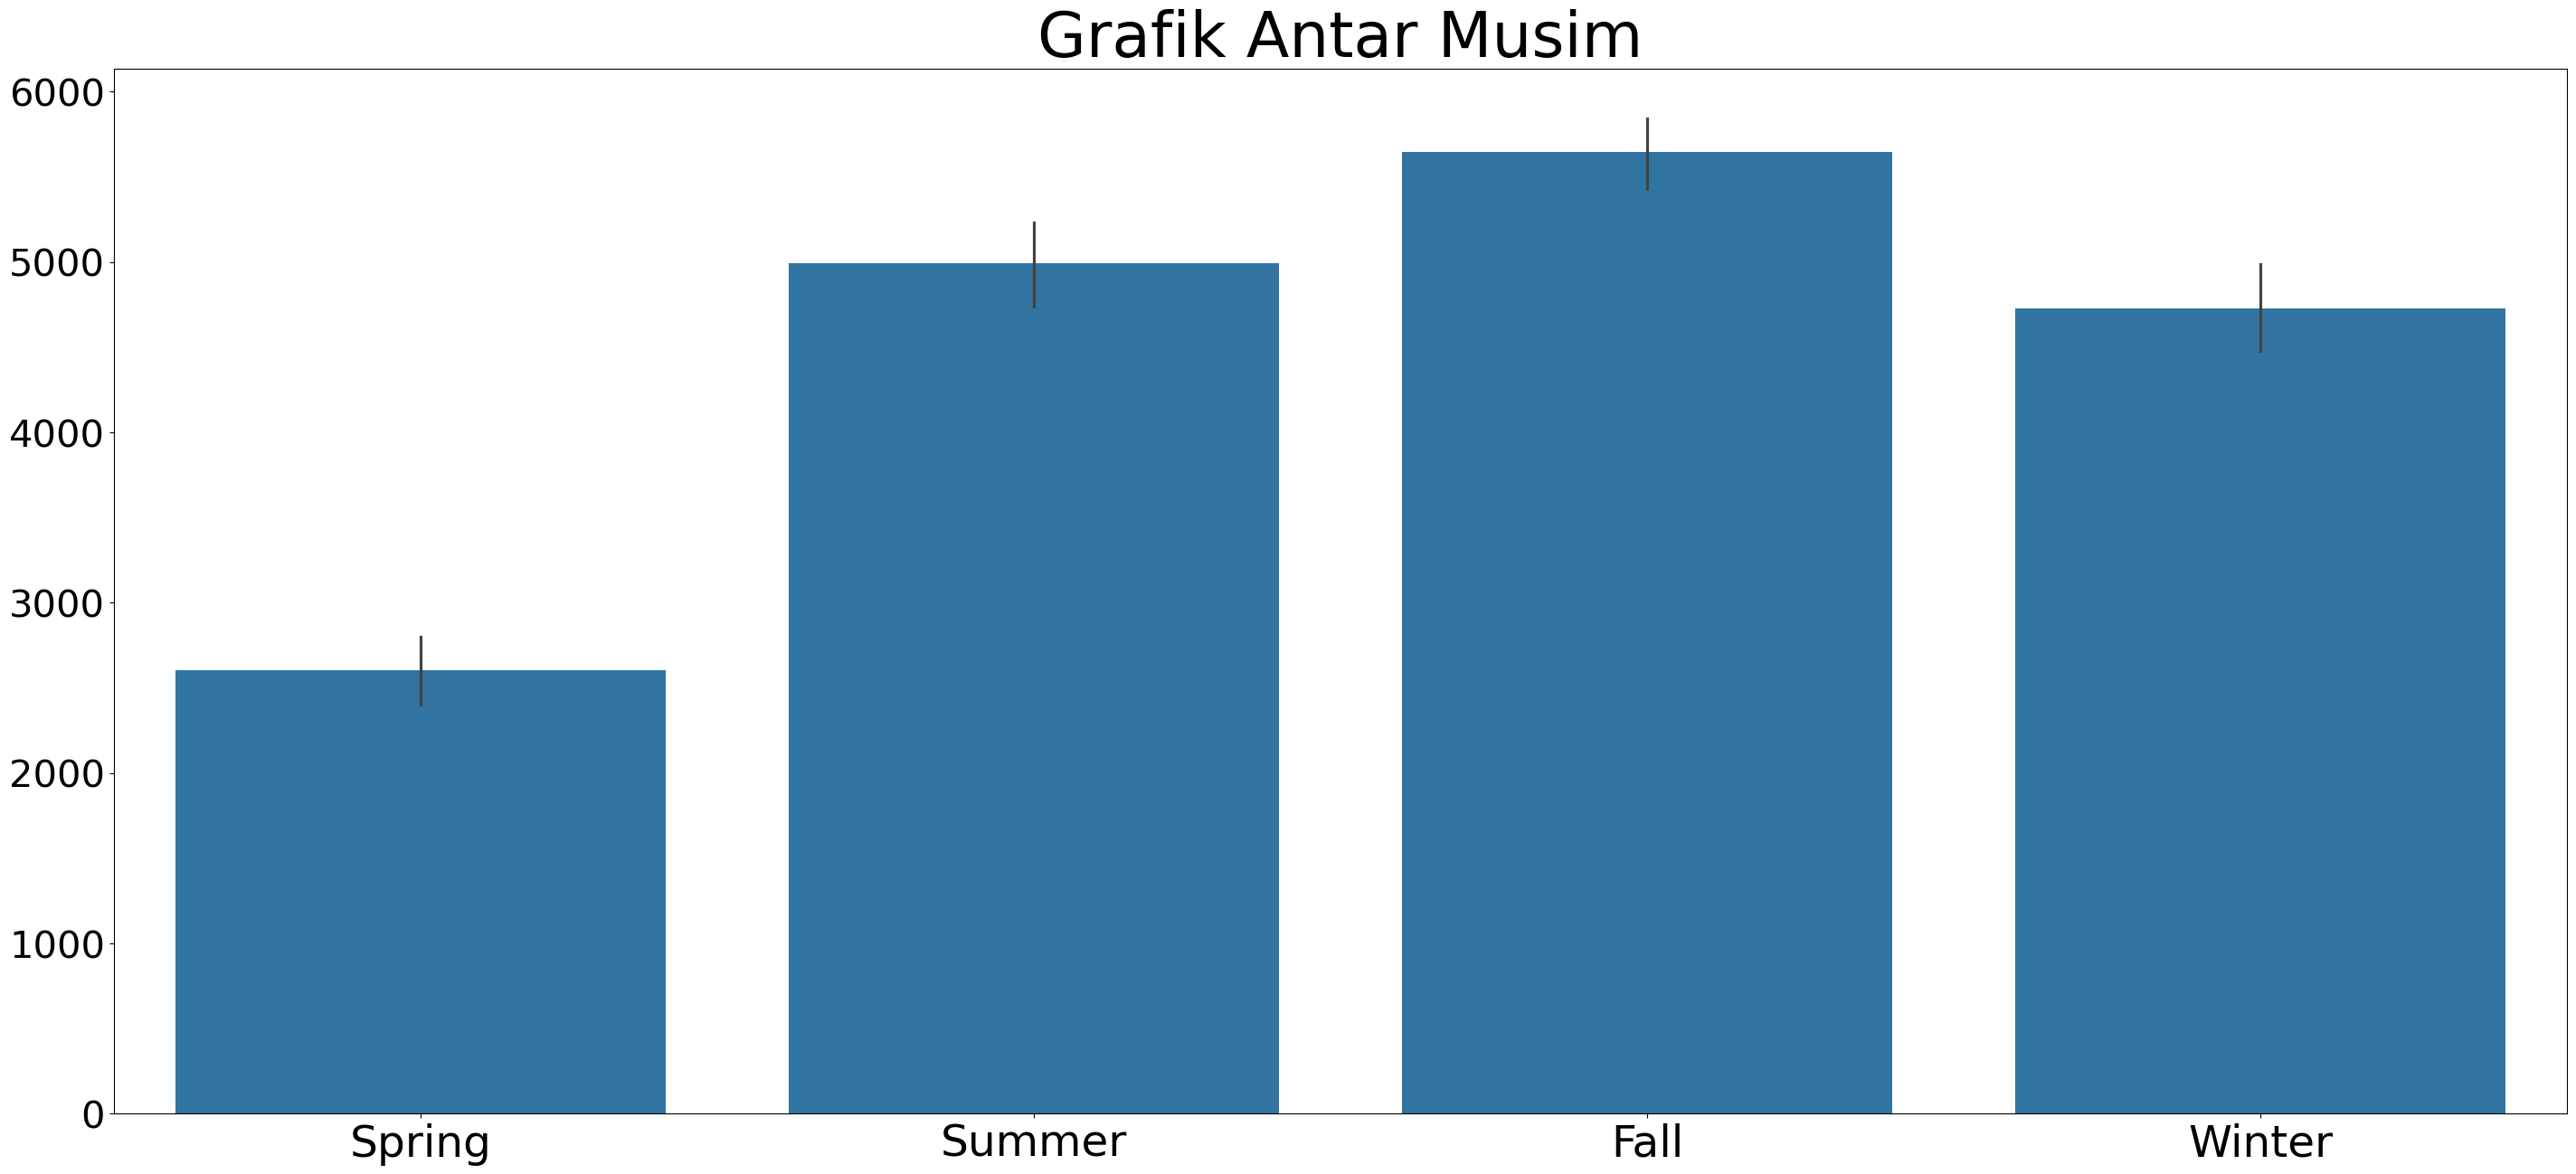

In [56]:
# membuat subplot dengan ukuran 35, 15
fig, ax = plt.subplots(figsize=(35, 15))

#buat barplot untuk y="total_count" dan x="season", menggunakan data="day_data"
sns.barplot(x="season", y="total_count", data=day_data,)

#mengatur label dan judul untuk subplot pertama
ax.set_ylabel(None)

# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# menampilkan plot
plt.show()

Musim paling banyak penyewa yaitu musim gugur(fall) diperoleh dari hasil grafiknya.

### Pertanyaan 3: Bagaimana performa penjualannya dalam beberapa tahun terakhir?

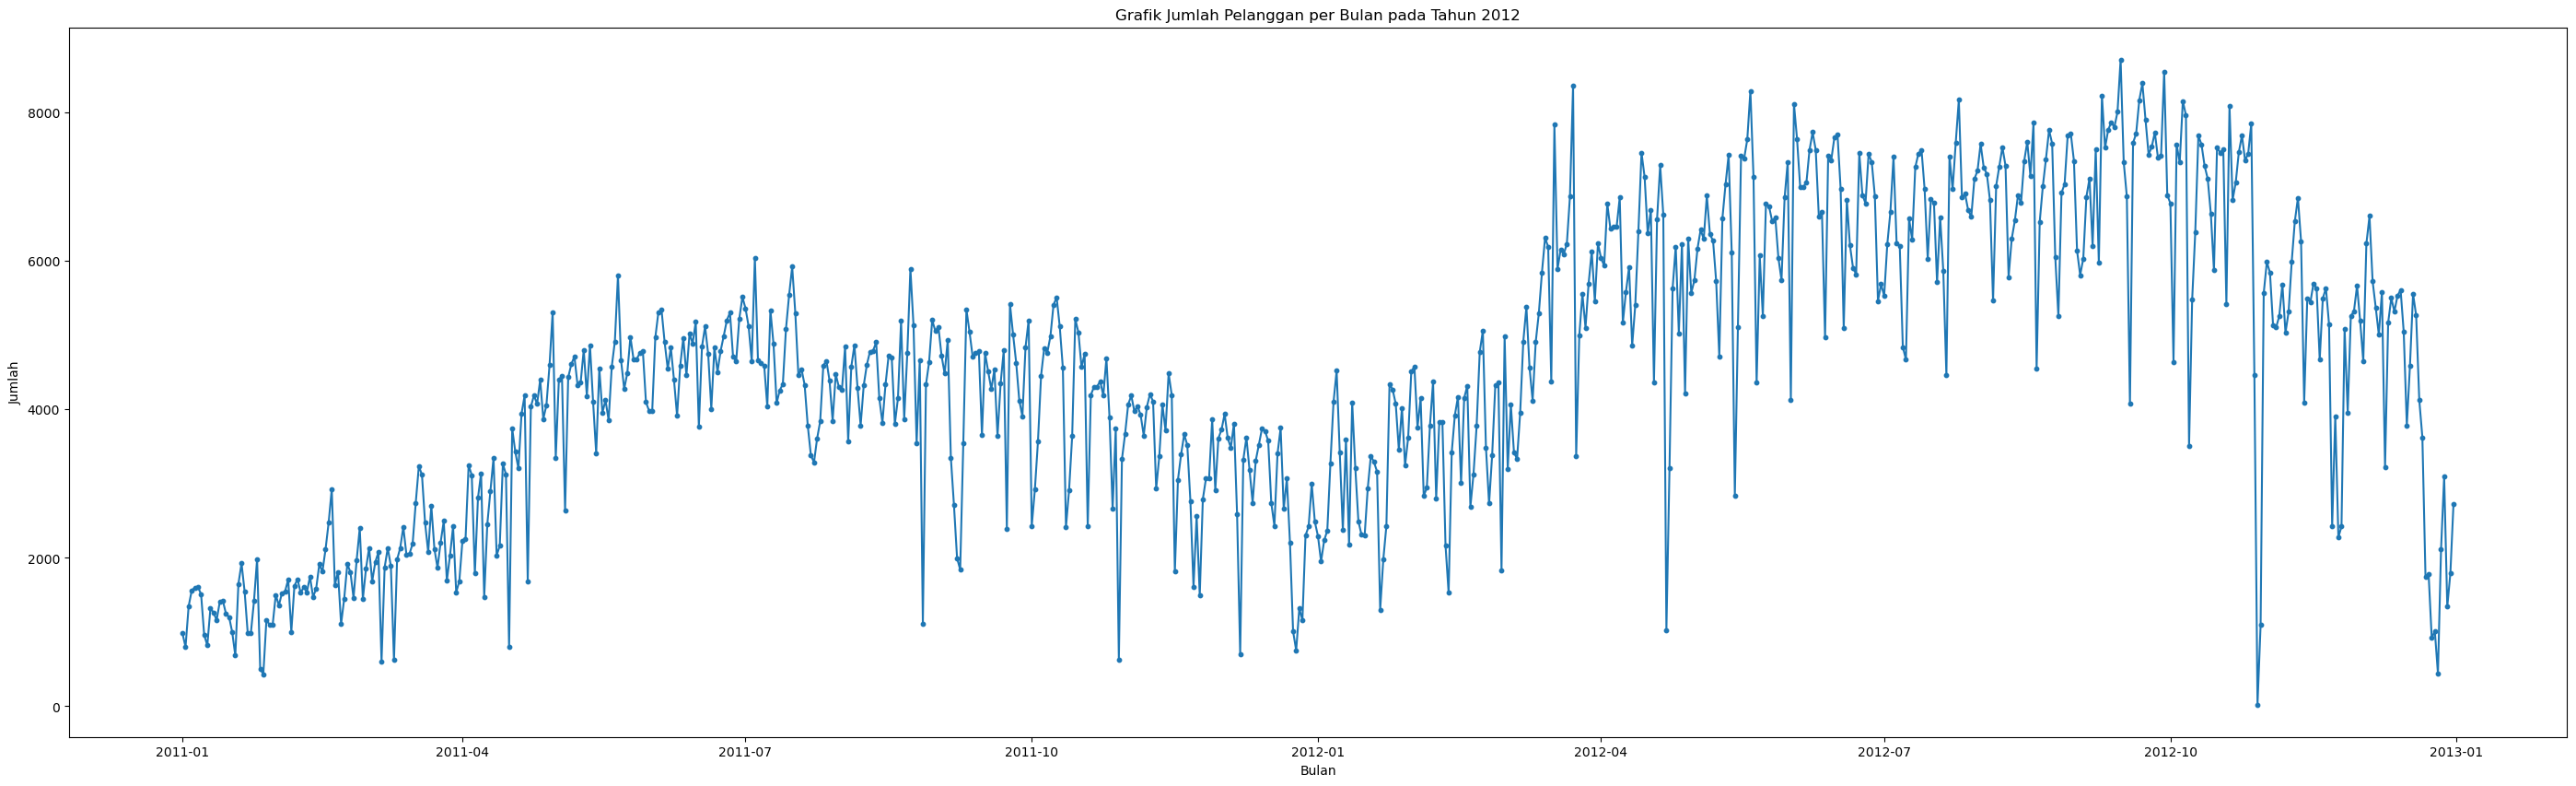

In [59]:
# membuat gambar dengan ukuran 35, 10
plt.figure(figsize=(35, 10))

# menghitung jumlah pelanggan maksimum perbulan
monthly_counts = day_data['total_count'].groupby(day_data['date']).max()

# membuat scatter plot untuk jumlah pelanggan maksimum per bulan, dengan warna biru dan marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, s=10, marker='o')

# membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values)

# penamaan untuk sumbu x
plt.xlabel('Bulan')

# penamaan untuk sumbu y
plt.ylabel('Jumlah')

# buat judul
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2012')

# menampilkan plot
plt.show()

Berdasarkan hasil data yang didapatkan, bahwa jumlah order terbanyak terjadi pada bulan september. Selain itu, bisa dilihat juga bahwa ada penurunan jumlah order pada bulan november dan desember.

### Pertanyaan 4: Apa Perbandingan antara customer register dan casual?

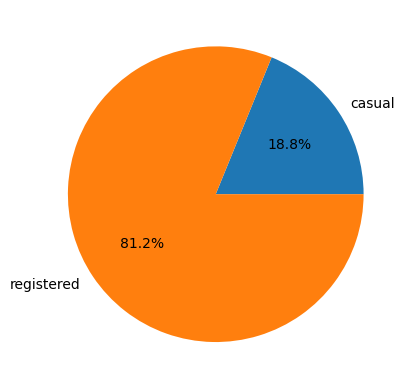

In [62]:
# memjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_data['casual'])

#menjumlahkan semua elemen yang ada pada kolom register
total_register = sum(day_data['registered'])

# membentuk data dalam bentuk pie plot
data = [total_casual, total_register]
labels = ['casual', 'registered']

#membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%')

# Menampilkan pie plot
plt.show()

Dari data yang didapatkan dari pie plot bahwa data register lebih banyak dibandingkan dari data casual yang mana data register sebesar 81,2% dan juga casual sebesar 18,8%.

## Conclusion

Pertanyaan:
1. Pada jam berapa sewa sepeda paling banyak dan sedikit?
2. Pada musim apa penyewaan sepeda paling banyak?
3. Bagaimana performa penjualannya dalam beberapa tahun terakhir?
4. Apa Perbandingan antara customer register dan casual?

- Conclution pertanyaan 1 : Berdasarkan hasil visualisasi, dapat disimpulkan bahwa penyewaan sepeda paling banyak digunakan pada jam 17 sekitar 300000-an penyewa. Sedangkan untuk penyewaan sepeda paling sedikit sekitar jam 4 yaitu dibawah 5000-an penyewa.

- Conclution pertanyaan 2 : Berdsarkan hasil visualisasi, didapatkan bahwa Musim paling banyak penyewa yaitu musim gugur(fall) diperoleh dari hasil grafiknya.

- Conclution pertanyaan 3 : Berdasarkan hasil data yang didapatkan, bahwa jumlah order terbanyak terjadi pada bulan september. Selain itu, bisa dilihat juga bahwa ada penurunan jumlah order pada bulan november dan desember.

- Conclution pertanyaan 4 : Dari data yang didapatkan dari pie plot bahwa data register lebih banyak dibandingkan dari data casual yang mana data register sebesar 81,2% dan juga casual sebesar 18,8%.

##Menerapkan teknik analisis lanjutan

###1. RFM analysis
Menggunakan teknik analisis lanjutan berupa RFM analysis untuk memahami perilaku pengguna dari 3 faktor utama:
- Recency (Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian)
- Frequency(Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu)
- Monetary(Menghitung total pengeluaran pelanggan dalam periode tersebut)

In [69]:
current_date = max(hour_data['date'])
rfm_analysis = hour_data.groupby('registered').agg({
    'date': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'total_count': 'sum'  # Monetary
}).reset_index()

In [70]:
# Mengganti nama kolom agar sesuai
rfm_analysis.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_analysis.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


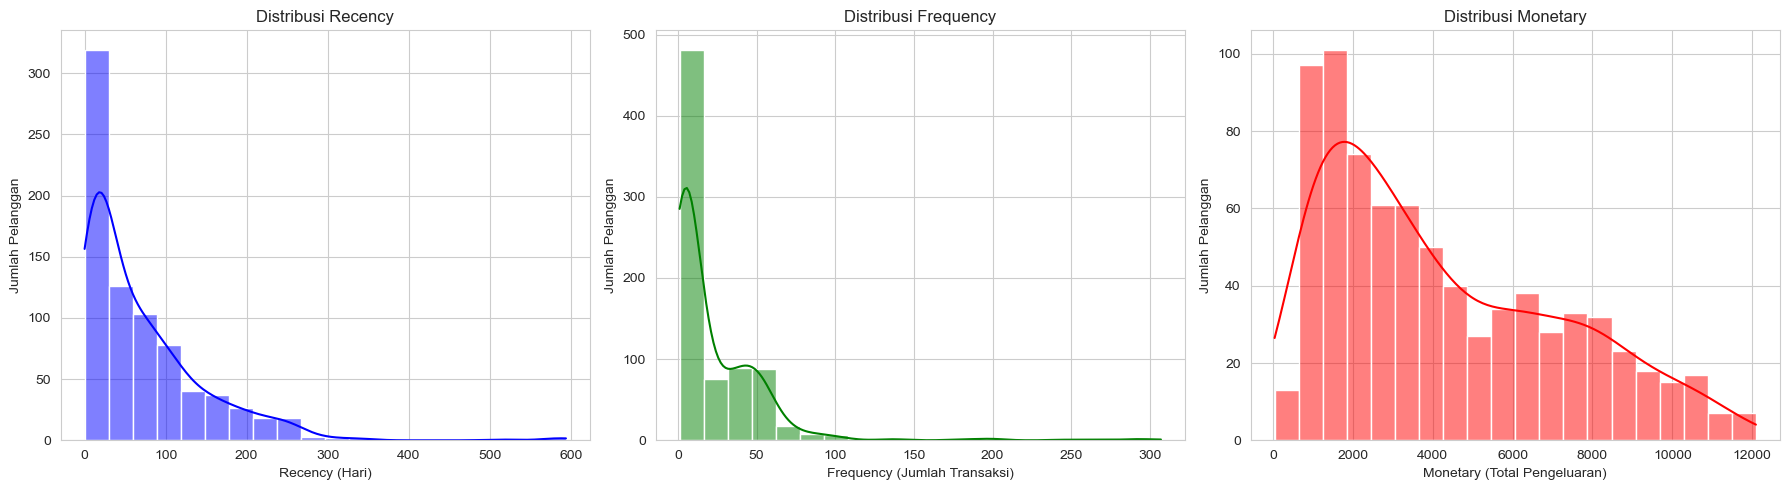

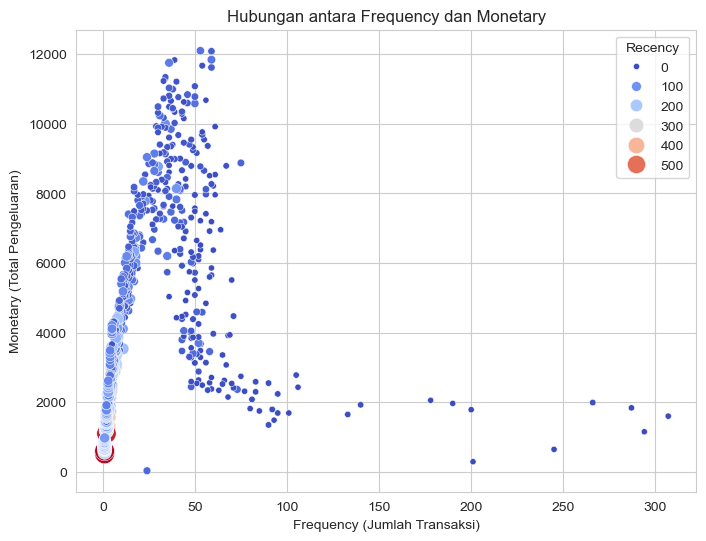

In [71]:
#membuat visualisasi nya
import matplotlib.pyplot as plt
import seaborn as sns

# Set style seaborn
sns.set_style("whitegrid")

# Membuat figure dengan 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram Recency
sns.histplot(rfm_analysis['Recency'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribusi Recency')
axes[0].set_xlabel('Recency (Hari)')
axes[0].set_ylabel('Jumlah Pelanggan')

# Histogram Frequency
sns.histplot(rfm_analysis['Frequency'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribusi Frequency')
axes[1].set_xlabel('Frequency (Jumlah Transaksi)')
axes[1].set_ylabel('Jumlah Pelanggan')

# Histogram Monetary
sns.histplot(rfm_analysis['Monetary'], bins=20, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribusi Monetary')
axes[2].set_xlabel('Monetary (Total Pengeluaran)')
axes[2].set_ylabel('Jumlah Pelanggan')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Scatter plot hubungan antara Frequency dan Monetary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm_analysis, x='Frequency', y='Monetary', hue='Recency', palette='coolwarm', size='Recency', sizes=(20, 200))
plt.title('Hubungan antara Frequency dan Monetary')
plt.xlabel('Frequency (Jumlah Transaksi)')
plt.ylabel('Monetary (Total Pengeluaran)')
plt.legend(title='Recency')
plt.show()
